<a href="https://colab.research.google.com/github/Venkata-Charan-Bejawada/FML_CHARAN_513/blob/main/FML_UnivariateRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate Regression on company data set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

data=pd.read_csv("Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
X = data.drop('Radio', axis=1).values
y = data['Radio'].values
     

In [8]:
X_1 =X[:, 2]

In [9]:
type(X_1),type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
X_1.shape,y.shape

((200,), (200,))

In [11]:
X_1 = X_1.reshape(-1,1)
y = y.reshape(-1, 1)

In [12]:
X_1.shape,y.shape


((200, 1), (200, 1))

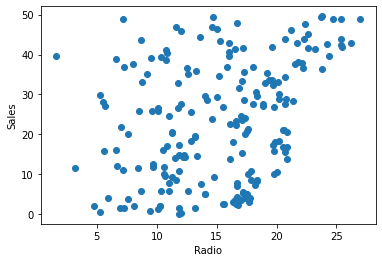

In [14]:
plt.scatter(X_1, y)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

#No Regularization

In [15]:
reg = linear_model.LinearRegression()
reg.fit(X_1, y)

LinearRegression()

In [16]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_1)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')
     

MAE = 11.826595555392128
MSE = 192.5148245722335
RMSE = 13.87497115572618
R_2 = 0.12224190399478618


In [17]:
prediction_space = np.linspace(min(X_1), max(X_1)).reshape(-1,1)

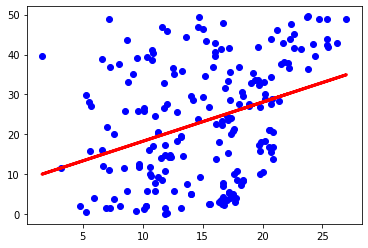

In [18]:
plt.scatter(X_1, y, color='blue')
plt.plot(X_1, reg.predict(X_1), color='red', linewidth=3)
plt.show()
     

#L1 regularization

In [35]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
reg_1 = Lasso(alpha=0.1)
reg_1.fit(X_train, y_train)

Lasso(alpha=0.1)

In [42]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg_1.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

Performance of the model on training data :

MAE = 8.522791105593985
MSE = 113.33404552361324
RMSE = 10.64584639770898
R_2 = 0.48651731735817694


In [43]:
y_pred2 = reg_1.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')
     

Performance of the model on test data :

MAE = 7.592324325407493
MSE = 84.63021053062427
RMSE = 9.199467948236151
R_2 = 0.6054533873794914


In [45]:
reg_1.score(X_test, y_test)

0.6054533873794914

#L2 regularization

In [48]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [49]:
reg_2 = Ridge(alpha = 0.1)
reg_2.fit(X_train, y_train)
     

Ridge(alpha=0.1)

In [50]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg_2.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')
     

Performance of the model on training data :

MAE = 8.512998185840537
MSE = 113.33179319876731
RMSE = 10.645740612976033
R_2 = 0.4865275219687927


In [51]:
y_pred2 = reg_2.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 7.581574704753746
MSE = 84.47443347457447
RMSE = 9.190997414566848
R_2 = 0.6061796210660566


In [52]:
reg_2.score(X_test, y_test)

0.6061796210660566